In [30]:
import stanza
import urduhack

import pandas as pd
import re
import numpy as np
from urduhack import normalize
from urduhack.preprocessing import normalize_whitespace
from urduhack.preprocessing import remove_punctuation
from urduhack.preprocessing import replace_urls
from urduhack.preprocessing import replace_emails
from urduhack.preprocessing import replace_numbers
from urduhack.preprocessing import remove_english_alphabets

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances


from bs4 import BeautifulSoup
from scipy.stats import multivariate_normal as mvn

import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import string

In [3]:
df = pd.read_csv('tweets.csv',encoding='utf-8',error_bad_lines=False)

D:\Softwares\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%a %b %d %H:%M:%S +0000 %Y')

# Pre-Processing

In [9]:
nlp = stanza.Pipeline(lang='ur', processors='tokenize,lemma')

2022-04-11 03:49:32 INFO: Loading these models for language: ur (Urdu):
| Processor | Package |
-----------------------
| tokenize  | udtb    |
| lemma     | udtb    |

2022-04-11 03:49:32 INFO: Use device: cpu
2022-04-11 03:49:32 INFO: Loading: tokenize
2022-04-11 03:49:32 INFO: Loading: lemma
2022-04-11 03:49:32 INFO: Done loading processors!


In [10]:
# urdu_swords = "ایت نہیں نے ہاں ہر ہم ہمارا ہمارے ہماری ہو ہوا ہوتا ہوتے ہوتی ہوتیں ہوں ہونا ہونگے ہونے ہونی ہوئے ہوئی ہوئیں ہے ہی ہیں و والا والوں والے والی وہ وہاں وہی وہیں یا یعنی یہ یہاں یہی یہیںاب ابھی اپنا اپنے اپنی اٹھا اس اسے اسی اگر ان انہوں انہی انہیں انھیں او اور اے ایسا ایسے ایسی ایک آ آپ آتا آتے آتی آگے آنا آنے آنی آئے آئی آئیں آیا با بڑا بڑے بڑی بعد بعض بلکہ بہت بھی بے پاس پر پہلے پھر تا تاکہ تب تجھ تجھے تک تم تمام تمہارا تمہارے تمھارے تمہاری تمہیں تمھیں تھا تھے تھی تھیں تو تیری تیرے جا جاتا جاتی جاتے جاتی جانے جانی جاؤ جائے جائیں جب جس جن جنہوں جنہیں جو جیسا جیسے جیسی جیسوں چاہیئے چلا چاہے چونکہ حالاں حالانکہ دو دونوں دوں دے دی دیا دیں دیے دیتا دیتے دیتی دینا دینے دینی دیئے ڈالا ڈالنا ڈالنے ڈالنی ڈالے ڈالی ذرا رکھا رکھتا رکھتے رکھتی رکھنا رکھنے رکھنی رکھے رکھی رہ رہا رہتا رہتے رہتی رہنا رہنے رہنی رہو رہے رہی رہیں زیادہ سا سامنے سب سکتا سو سے سی شاید صرف طرح طرف عین کا کبھی کچھ کہہ کر کرتا کرتے کرتی کرنا کرنے کرو کروں کرے کریں کس کسے کسی کہ کہا کہے کو کون کوئی کے کی کیا کیسے کیوں کیونکہ کیے کئے گا گویا گے گی گیا گئے گئی لا لاتا لاتے لاتی لانا لانے لانی لایا لائے لائی لگا لگے لگی لگیں لو لے لی لیا لیتا لیتے لیتی لیکن لیں لیے لئے مجھ مجھے مگر میرا میرے میری میں نا نہ نہایت نہیں نے ہاں ہر ہم ہمارا ہمارے ہماری ہو ہوا ہوتا ہوتے ہوتی ہوتیں ہوں ہونا ہونگے ہونے ہونی ہوئے ہوئی ہوئیں ہے ہی ہیں و والا والوں والے والی وہ وہاں وہی وہیں یا یعنی یہ یہاں یہی یہیں"
# stop_words = ""
# doc = nlp(urdu_swords)
# a = doc.to_dict()
# a=a[0]
# for i in a:
#     stop_words=stop_words+(i['lemma'])+" "
    
# #print(stop_words)

# stop_words = stop_words.split()
# stop_words = " ".join(sorted(set(stop_words), key=stop_words.index))


In [11]:
stop_word = 'ایت نہیں نے ہاں ہر ہم مےں ہو ہے ہی و والا وہ وہاں وہی وہیں یا یعنی یہ یہاں یہیںاب ابھی اپنا اٹھ اگر او اور اے ایسا ایک آ آپ آگے آنی آئی با بڑا بڑی بعد بعض بلکہ بہت بھی بے پاس پر پہلے پھر تا تاکہ تب تجھ تو تک تمام تمہارا تمھارا تم تمھ تھا تیری تیرا جا جاؤ جب جو جیسا جیسے جیسی جیس چاہیئے چل چاہ چونکہ حالاں حالانکہ دو دوں دے دینی ڈال ڈالنا ڈالنی ذرا رکھ رکھنی رہ رہنی زیادہ سا سامنے سب سک سو سے سی شاید صرف طرح طرف عین کا کبھی کچھ کہہ کر کون کوا کوئی کہ کہا کو کیسا کیوں کیونکہ گا گویا گے گی لا لاتا لاتی لانی لائے لگ لو لے لیکن لیے لئے مجھ مگر میرا میرے میں نا نہ نہایت یہیں'
stop_word = stop_word.split()

In [13]:
def preprocess(word):
    word = re.sub("\W", " ",word)
    word = re.sub("[a-zA-Z0-9]","",word)
    word = normalize_whitespace(word)
    word = remove_punctuation(word)
    word = replace_urls(word)
    word = replace_emails(word)
    #word = normalize(word)
    word = replace_numbers(word)
    #STanza lemmentization normalize
    
    doc = nlp(word)
    a = doc.to_dict()
    if(len(a) != 0):
        a = a[0]
        word = ''
        for i in a:
            if not i['lemma'] in stop_word:
                if(i['id']==(a[-1]['id'])):
                    word=word+i['lemma']
                else:
                    word = word+i['lemma']+' '
    
    return word

In [14]:
def remove_duplicate_words(string):
        x = string.split()
        x = sorted(set(x), key = x.index)
        return ' '.join(x)

In [15]:
df.head()

,Unnamed: 0,text,timestamp
0,0,@SaeedGhani1 چاچا\r\nستو پی لیا ہو تو دیکھو\r\...,2022-04-10 20:09:56
1,1,"RT @SSEHBAI1: لوگ باہر: جیسے لوگ نکل رہے ہیں, ...",2022-04-10 20:09:56
2,2,RT @FaisalJavedKhan: آپکی رائے میں کیا تحریک ا...,2022-04-10 20:09:57
3,3,RT @Abdulla78487680: جس سے جگر لالہ میں ٹھنڈک ...,2022-04-10 20:09:57
4,4,RT @fawadchaudhry: شہباز شریف کے کاغذات نامزدگ...,2022-04-10 20:09:57


In [16]:
list1 = []
for i in range(len(df.index)):
    sent = df[df.columns[1]][i]
    list1.append(sent)
    

In [17]:
sent_p =[]
for tweet in list1:
    sent_p.append(preprocess(tweet))

# Timestamp

In [100]:
type(df2['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [101]:
df2 = pd.DataFrame(sent_p,columns = ["tweets"])

In [102]:
df2['timestamp'] = pd.to_datetime(df['timestamp'], format='%a %b %d %H:%M:%S +0000 %Y')

In [114]:
def timefilter(start,end):
    filteredTw = []
    filteredTm = []
    for i in range(0,len(df2)):
        if (df2['timestamp'][i] >= start) & (df2['timestamp'][i] <= end):
            filteredTw.append(df2['tweets'][i])
            filteredTm.append(df2['timestamp'][i])
    filtered = pd.DataFrame()
    filtered['tweets'] = pd.DataFrame(filteredTw)
    filtered['timestamp'] = pd.DataFrame(filteredTm)
    
#     filtered = df2[(df2['timestamp'] >= start) & (df2['timestamp'] <= end)]
    return filtered

In [115]:
timefilter(pd.Timestamp(2022,4,10,20,9,55),pd.Timestamp(2022,4,10,20,10,57))


,tweets,timestamp
0,چاچا ستو پی دیکھ پاکستان عوام نکلی یے,2022-04-10 20:09:56
1,لوگ باہر لوگ نکل جلسا ملک باہر بغیر لیڈر خود خ...,2022-04-10 20:09:56
2,آپکی رائے تحریک انصاف اسمبلی مستعفی چاہیے,2022-04-10 20:09:57
3,جگر لالہ ٹھنڈک شبنم دریا دل دہل طوفان لحظہ موم...,2022-04-10 20:09:57
4,شہباز شریف کاغذہ نامزدگی منظور ایف آئ پہلا آرڈ...,2022-04-10 20:09:57
...,...,...
942,راولپنڈی لوگ سڑک پہ چھتہ پاکستان شہر سمیت دنیا...,2022-04-10 20:10:57
943,بھائی غلامی س غلامی بہتر مسلط نمبر سروے مالکان...,2022-04-10 20:10:57
944,سمجھ بکا میڈیا روک انقلاب روک غصہ انصاف خلاف ا...,2022-04-10 20:10:57
945,دیکھ آنکھ کھول دیکھ بےشرم جاہل سمجھ عوام اب بت...,2022-04-10 20:10:57


In [105]:
df2

,tweets,timestamp
0,چاچا ستو پی دیکھ پاکستان عوام نکلی یے,2022-04-10 20:09:56
1,لوگ باہر لوگ نکل جلسا ملک باہر بغیر لیڈر خود خ...,2022-04-10 20:09:56
2,آپکی رائے تحریک انصاف اسمبلی مستعفی چاہیے,2022-04-10 20:09:57
3,جگر لالہ ٹھنڈک شبنم دریا دل دہل طوفان لحظہ موم...,2022-04-10 20:09:57
4,شہباز شریف کاغذہ نامزدگی منظور ایف آئ پہلا آرڈ...,2022-04-10 20:09:57
...,...,...
996,چوکیدار منصف چور ساتھ مل انکو حکومت لوگ خود جا...,2022-04-10 20:11:00
997,عرض سیاست فیصلہ عدالت کوشش تباہ کن سمجھ آج باہ...,2022-04-10 20:11:00
998,غلط بندہ چھیڑ بیٹھ نادان,2022-04-10 20:11:00
999,شمع فروزاں آندھی ڈراتا شمع فروزاں پروانہ ہزار ...,2022-04-10 20:11:00


# TF-IDF

In [191]:
from sklearn.cluster import KMeans  
data = df2
tf_idf_vectorizor = TfidfVectorizer(max_features = 5000)
tf_idf = tf_idf_vectorizor.fit_transform(df2['tweets'][:])
tf_idf_norm = normalize(tf_idf)

tf_idf_array = tf_idf_norm.toarray()
a = pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names())

c:\users\bilawal ali\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Kneed-Point

In [184]:
df.dtypes

Unnamed: 0             int64
text                  object
timestamp     datetime64[ns]
dtype: object

# Clustering with Time-stamp

In [143]:
k = 3
model = KMeans(n_clusters=k)

labels = model.fit(tf_idf_array)

In [164]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tf_idf_vectorizor.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 عمران
 میڈیا
 پاکستان
 احتجاج
 خان
 دکھ
 اتنا
 تحریک
 انصاف
 عوام
Cluster 1:
 باہر
 لوگ
 باہرایگا
 شر
 جلسا
 نام
 حال
 بغیر
 لیڈر
 خود
Cluster 2:
 ھکاری
 باپ
 پاکستانی
 امپورٹڈحکومتنامنظور
 لوگ
 خان
 نکل
 اب
 باہرایگا
 پاکستان


In [145]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
predicted_values = model.predict(tf_idf_array)

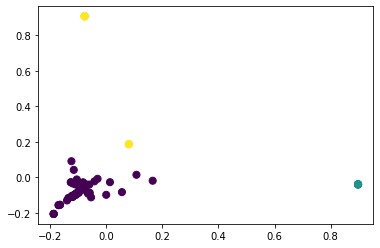

In [138]:
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

In [156]:
clusters = []
for i in range(k):
    clusters.append([])

for i,row in df.iterrows():
    clusters[predicted_values[i]].append(row['text'])

In [160]:
for i in range(len(clusters)):
    print("Cluster: " + str(i))
    for j in range(5):
        print(clusters[i][j]+'\n')

Cluster: 0
@SaeedGhani1 چاچا
ستو پی لیا ہو تو دیکھو
پاکستان میں عوام کیسے نکلی یے

RT @FaisalJavedKhan: آپکی رائے میں کیا تحریک انصاف کو اسمبلی سے مستعفیٰ ہو جانا چاہیے یا نہیں ؟

RT @Abdulla78487680: جس سے جگر لالہ میں ٹھنڈک ہو وہ شبنم

دریاؤں کے دل جس سے دہل جائیں وہ طوفان،

ہر لحظہ ہے مومن.

#امپورٹڈ_گورمنٹ_نامنظور…

RT @fawadchaudhry: شہباز شریف کے کاغذات نامزدگی منظور ہونے کے بعد ایف آئ اے سے پہلا آرڈر یہ ہوا ہے کہ کل وکلاء کی ٹیم شہباز شریف کے مقدمے م…

RT @Sarfraz053: @MaddyWithKhan عمران خان نے کہا تھا، میرا ووٹر ابھی چھوٹا ہے ۔ لیکن جب وہ 18 سال کا ہوگا تو سارے ووٹس میرے ہوں گے ۔ آج وہ و…

Cluster: 1
RT @SSEHBAI1: لوگ باہر: جیسے لوگ نکل رہے ہیں, جلسے ملک اور باہر بغیر لیڈر کے ہو رہے ہیں، جب خود خان باہرایگا تو کیا حال ہوگا - یہ نام کے شر…

RT @SSEHBAI1: لوگ باہر: جیسے لوگ نکل رہے ہیں, جلسے ملک اور باہر بغیر لیڈر کے ہو رہے ہیں، جب خود خان باہرایگا تو کیا حال ہوگا - یہ نام کے شر…

RT @SSEHBAI1: لوگ باہر: جیسے لوگ نکل رہے ہیں, جلسے ملک اور باہر بغیر لیڈر کے ہو رہے ہیں، جب خود خان